In [3]:
# Read in the consolidated data
import pandas as pd

JPE_consolidated = pd.read_excel('/Users/MattJohnson/Library/CloudStorage/OneDrive-UniversityofCapeTown/Masters_thesis/Data checks/Consolidation/Finalized/JPE_aff_ref_output_1940_2010_affs_out authors Finalized.xlsx', 'Final JPE')

In [13]:
# This is taking a dataframe with multiple affilitaion columns and melting these to be all one column.
melted = JPE_consolidated.melt(id_vars= ['Article_ID','year'], value_vars=['0_author_affs_consolidated_0','0_author_affs_consolidated_1','0_author_affs_consolidated_2','1_author_affs_consolidated_0','1_author_affs_consolidated_1','1_author_affs_consolidated_2','2_author_affs_consolidated_0','2_author_affs_consolidated_1','2_author_affs_consolidated_2','3_author_affs_consolidated_0']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
melted = melted.sort_values(by = ['year'])
print(melted.head())

    Article_ID    year                    Aff number              Affiliation
0    1825913.0  1940.0  0_author_affs_consolidated_0     Washington DC (City)
25   1825909.0  1940.0  0_author_affs_consolidated_0    University Of Arizona
26   1825908.0  1940.0  0_author_affs_consolidated_0    University Of Chicago
27   1824384.0  1940.0  0_author_affs_consolidated_0      Columbia University
28   1824383.0  1940.0  0_author_affs_consolidated_0  University of Cambridge


In [14]:
# Counting the number of times a certain affiliton occurs
melted['aff_cum_counts'] = melted.groupby(['Affiliation']).cumcount()+1
melted.head()
#melted.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/JPE/Test files/JPE_melted_master_aff_count.xlsx') 

,Article_ID,year,Aff number,Affiliation,aff_cum_counts
0,1825913.0,1940.0,0_author_affs_consolidated_0,Washington DC (City),1
25,1825909.0,1940.0,0_author_affs_consolidated_0,University Of Arizona,1
26,1825908.0,1940.0,0_author_affs_consolidated_0,University Of Chicago,1
27,1824384.0,1940.0,0_author_affs_consolidated_0,Columbia University,1
28,1824383.0,1940.0,0_author_affs_consolidated_0,University of Cambridge,1


In [15]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = melted.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

highest_vals_10 = highest_vals_10[['Article_ID' ,'Aff number', 'Affiliation', 'year','aff_cum_counts']]
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
4302,26549894.0,0_author_affs_consolidated_0,University Of Chicago,2016.0,538
21630,26549905.0,1_author_affs_consolidated_1,National Bureau Of Economic Research,2016.0,511
17327,26549871.0,1_author_affs_consolidated_0,Harvard University,2016.0,253
43350,26549870.0,3_author_affs_consolidated_0,Massachusetts Institute Of Technology,2016.0,222
17331,26549883.0,1_author_affs_consolidated_0,University Of Pennsylvania,2016.0,169
17318,26549861.0,1_author_affs_consolidated_0,Stanford University,2016.0,168
17297,26549890.0,1_author_affs_consolidated_0,Princeton University,2016.0,159
17304,26549900.0,1_author_affs_consolidated_0,Columbia University,2016.0,149
17317,26549862.0,1_author_affs_consolidated_0,Northwestern University,2016.0,134
4326,26549911.0,0_author_affs_consolidated_0,Yale University,2016.0,130


    Article_ID    year                    Aff number              Affiliation  \
0    1825913.0  1940.0  0_author_affs_consolidated_0     Washington DC (City)   
25   1825909.0  1940.0  0_author_affs_consolidated_0    University Of Arizona   
26   1825908.0  1940.0  0_author_affs_consolidated_0    University Of Chicago   
27   1824384.0  1940.0  0_author_affs_consolidated_0      Columbia University   
28   1824383.0  1940.0  0_author_affs_consolidated_0  University of Cambridge   

    aff_cum_counts  
0                1  
25               1  
26               1  
27               1  
28               1  


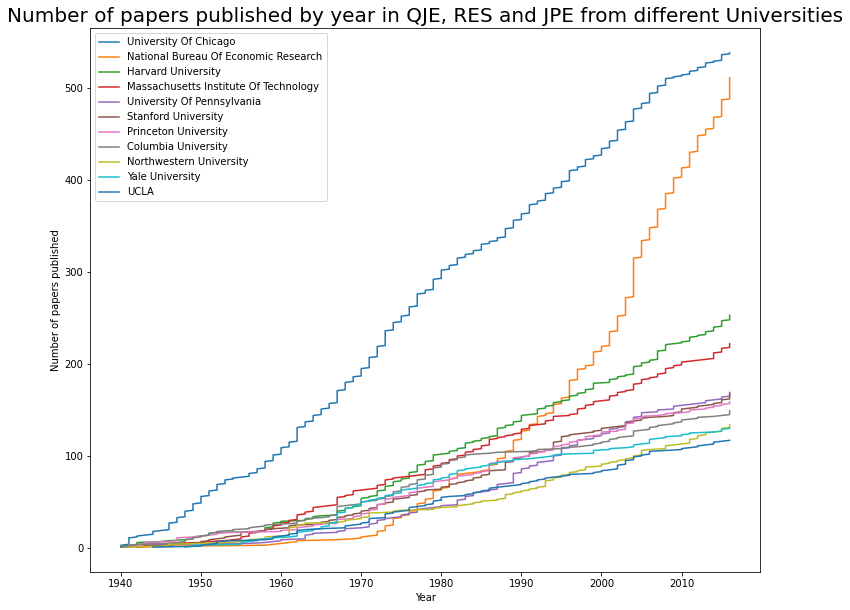

In [16]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = melted
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])]
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])]
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])]
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])]
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])]
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])]
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])]
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])]
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])]
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])]
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])]

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES and JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()